In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import os, sys
from importlib import reload

import numpy as np
import numpy.linalg as la
from numpy import fft

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import AsinhStretch
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.visualization import astropy_mpl_style
from astropy.stats import sigma_clipped_stats
from astropy.nddata import NDData

stretch = AsinhStretch()

from photutils.detection import DAOStarFinder
from photutils.psf import EPSFBuilder
from photutils.psf import extract_stars

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use(astropy_mpl_style)
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.interpolation'] = 'none'

In [2]:
sys.path.append('.')

import autils

Load some test data

In [3]:
from astropy.utils.data import download_file

image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )
# image_data = fits.getdata(image_file)
with fits.open(image_file) as hdu: 
    image_data = hdu[0].data
    image_header = hdu[0].header
    image_wcs = WCS(image_header)

In [7]:
reload(autils)

autils.interactive_plot(image_data, wcs=image_wcs)

Output()

FloatSlider(value=1.0, continuous_update=False, description='Slider:', max=5.0)

Button(description='Reset Slider', style=ButtonStyle())

Output()

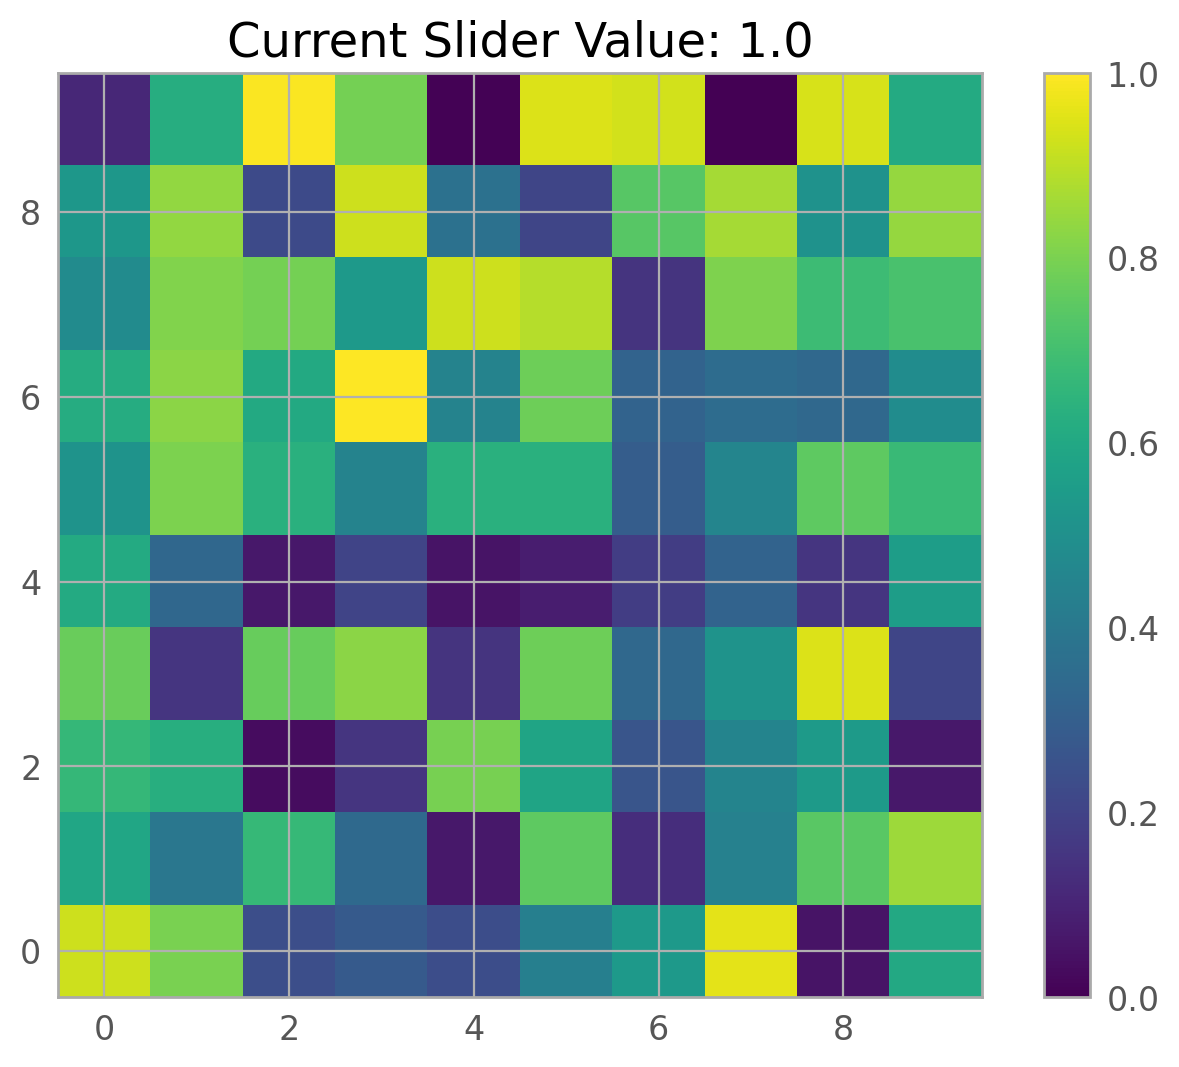

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Function to update the plot based on the slider value
def update_plot(slider_value):
    plt.clf()  # Clear the current figure
    data = np.random.rand(10, 10) * slider_value  # Update data based on slider value
    plt.imshow(data, cmap='viridis', vmin=0, vmax=slider_value)
    plt.colorbar()
    plt.title(f"Current Slider Value: {slider_value}")
    plt.show()

# Function to reset the slider to a specific value
def reset_slider(slider, value):
    slider.value = value  # Reset the slider to the specified value

# Set up default slider value
default_value = 1.0

# Create a FloatSlider
slider = widgets.FloatSlider(
    value=default_value,
    min=0,
    max=5,
    step=0.1,
    description='Slider:',
    continuous_update=False
)

# Create a Button with a lambda to pass the slider and default value
reset_button = widgets.Button(
    description='Reset Slider'
)

# Set up event handling for the button click, passing slider and default_value
reset_button.on_click(lambda b: reset_slider(slider, default_value))

# Create interactive output for the plot
output = widgets.interactive_output(update_plot, {'slider_value': slider})

# Display the slider, button, and output area
display(slider, reset_button, output)

# Initial plot
update_plot(slider.value)
